# Optimisation: CMA-ES

This example shows you how to run a global optimisation with [CMA-ES](http://pints.readthedocs.io/en/latest/optimisers/cmaes.html).

For a more elaborate example of an optimisation, see: https://github.com/martinjrobins/pints/blob/master/examples/optimisation-first-example.ipynb

Population size 8
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 2 (seed=768679, Thu Dec  7 13:49:38 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.245526322542781e+06 1.0e+00 1.01e-02  8e-03  1e-02 0:00.0
    2     16 2.525412681998089e+06 1.5e+00 8.07e-03  6e-03  7e-03 0:00.0
    3     24 1.287706944868901e+06 1.4e+00 6.46e-03  5e-03  5e-03 0:00.0
  100    800 1.010623617335479e+05 4.4e+04 9.76e-03  2e-08  5e-04 0:00.4
  200   1600 1.010623616976111e+05 4.1e+04 7.72e-04  5e-12  1e-07 0:00.7
  300   2400 1.010623616976111e+05 7.9e+04 8.01e-04  1e-13  6e-09 0:01.3
  400   3200 1.010623616976111e+05 1.6e+04 8.23e-03  7e-14  9e-10 0:01.7
  500   4000 1.010623616976111e+05 9.1e+04 2.76e-03  7e-16  1e-11 0:02.1
  502   4016 1.010623616976111e+05 8.2e+04 2.17e-03  6e-16  1e-11 0:02.1
termination on tolx=1e-11
final/bestever f-value = 1.010624e+05 1.010624e+05
incumbent solution: [0.014997078393047182, 500.04751377166406]
std deviation: [5.87709

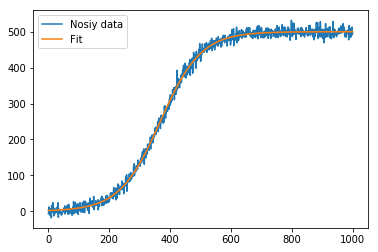

In [8]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.Boundaries([0, 400], [0.03, 600])

# Perform an optimization with boundaries and hints
x0 = 0.01, 450
sigma0 = [0.01, 100]
found_parameters, found_value = pints.cmaes(
    score,
    boundaries,
    x0,
    sigma0,
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of plot
pl.figure()
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()